In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime
import ipywidgets as widgets

In [3]:
#import sales data from csv file 
salesData = pd.read_csv("large_sales_data.csv")

#import product data from csv file 
productData = pd.read_csv("large_product_details.csv")

In [4]:
#check the first 10 rows of sales data
salesData.head(10)

,TransactionID,ProductID,CustomerID,Quantity,SaleDate
0,1,104,1248,7,2020-01-01 00:00:00
1,2,103,1874,6,2020-01-01 00:00:00
2,3,105,1792,4,2020-01-01 00:00:00
3,4,108,1783,5,2020-01-01 00:00:00
4,5,106,1924,9,2020-01-01 00:00:00
5,6,110,1794,3,2020-01-01 00:00:00
6,7,142,1150,7,2020-01-01 00:00:00
7,8,112,1103,8,2020-01-01 00:00:00
8,9,131,1150,1,2020-01-01 00:00:00
9,10,111,1846,2,2020-01-01 00:00:00


In [5]:
#check the first 10 rows of the product data 
productData.head(10)

,ProductID,ProductName,Category,Price,Stock
0,101,Product_101,Clothing,242.23,90
1,102,Product_102,Accessories,421.42,80
2,103,Product_103,Books,226.54,64
3,104,Product_104,Accessories,150.05,301
4,105,Product_105,Accessories,432.49,21
5,106,Product_106,Electronics,468.71,437
6,107,Product_107,Accessories,217.68,458
7,108,Product_108,Clothing,25.45,444
8,109,Product_109,Accessories,369.55,360
9,110,Product_110,Groceries,493.78,377


In [6]:
#check the shape of both the dataframes 
print("Shape of sales data : " + str(salesData.shape) + "\nShape of product data  :" + str(productData.shape))

Shape of sales data : (1000000, 5)
Shape of product data  :(1000, 5)


In [7]:
#Check if any null data is there in any of the column in the sales data frame 
salesData.isnull().any()

TransactionID    False
ProductID        False
CustomerID       False
Quantity         False
SaleDate         False
dtype: bool

In [8]:
#Check if any null data is there in any of the column in the product data frame 
productData.isnull().any()

ProductID      False
ProductName    False
Category       False
Price          False
Stock          False
dtype: bool

In [9]:
#Check if any null data is there in any of the row in the sales data frame 
salesData.duplicated().any()

False

In [10]:
#Check if any null data is there in any of the row in the product data frame 
productData.duplicated().any()

False

In [11]:
#Merging both the sales data and product data to form a commercial data frame 
#by the product id 
commercialData = pd.merge(salesData, productData, on='ProductID')

#Checking first 10 rows of the commercial data frames 
commercialData.head(10)

,TransactionID,ProductID,CustomerID,Quantity,SaleDate,ProductName,Category,Price,Stock
0,1,104,1248,7,2020-01-01 00:00:00,Product_104,Accessories,150.05,301
1,2,103,1874,6,2020-01-01 00:00:00,Product_103,Books,226.54,64
2,3,105,1792,4,2020-01-01 00:00:00,Product_105,Accessories,432.49,21
3,4,108,1783,5,2020-01-01 00:00:00,Product_108,Clothing,25.45,444
4,5,106,1924,9,2020-01-01 00:00:00,Product_106,Electronics,468.71,437
5,6,110,1794,3,2020-01-01 00:00:00,Product_110,Groceries,493.78,377
6,7,142,1150,7,2020-01-01 00:00:00,Product_142,Accessories,48.73,479
7,8,112,1103,8,2020-01-01 00:00:00,Product_112,Electronics,154.22,179
8,9,131,1150,1,2020-01-01 00:00:00,Product_131,Books,157.36,90
9,10,111,1846,2,2020-01-01 00:00:00,Product_111,Groceries,140.77,228


In [12]:
#Create a new columns 'TotalSaleAmount' to store total price paid in the transaction
commercialData['TotalSaleAmount'] = commercialData.apply(lambda row : (row['Quantity'] * row['Price']), axis=1)

#View first 10 rows 
commercialData.head(10)

,TransactionID,ProductID,CustomerID,Quantity,SaleDate,ProductName,Category,Price,Stock,TotalSaleAmount
0,1,104,1248,7,2020-01-01 00:00:00,Product_104,Accessories,150.05,301,1050.35
1,2,103,1874,6,2020-01-01 00:00:00,Product_103,Books,226.54,64,1359.24
2,3,105,1792,4,2020-01-01 00:00:00,Product_105,Accessories,432.49,21,1729.96
3,4,108,1783,5,2020-01-01 00:00:00,Product_108,Clothing,25.45,444,127.25
4,5,106,1924,9,2020-01-01 00:00:00,Product_106,Electronics,468.71,437,4218.39
5,6,110,1794,3,2020-01-01 00:00:00,Product_110,Groceries,493.78,377,1481.34
6,7,142,1150,7,2020-01-01 00:00:00,Product_142,Accessories,48.73,479,341.11
7,8,112,1103,8,2020-01-01 00:00:00,Product_112,Electronics,154.22,179,1233.76
8,9,131,1150,1,2020-01-01 00:00:00,Product_131,Books,157.36,90,157.36
9,10,111,1846,2,2020-01-01 00:00:00,Product_111,Groceries,140.77,228,281.54


In [13]:
commercialData.shape

(1000000, 10)

In [14]:
#Save the newly completed csv file 
commercialData.to_csv('complete_data.csv', index=False)

In [15]:
#Create a new column 'LowStock which check if the stock is low or not 
productData["LowStock"] = productData.apply(lambda row : (row['Stock'] <= 10), axis=1)
productData.head(10)

,ProductID,ProductName,Category,Price,Stock,LowStock
0,101,Product_101,Clothing,242.23,90,False
1,102,Product_102,Accessories,421.42,80,False
2,103,Product_103,Books,226.54,64,False
3,104,Product_104,Accessories,150.05,301,False
4,105,Product_105,Accessories,432.49,21,False
5,106,Product_106,Electronics,468.71,437,False
6,107,Product_107,Accessories,217.68,458,False
7,108,Product_108,Clothing,25.45,444,False
8,109,Product_109,Accessories,369.55,360,False
9,110,Product_110,Groceries,493.78,377,False


In [16]:
#Finf the aggregate quantity of each product category
total_quantity_by_category = commercialData.groupby('Category').agg({'Quantity':'sum'})

#Locate the location of category with maximum quantity
total_quantity_by_category.loc[total_quantity_by_category["Quantity"].idxmax()]

Quantity    1428834
Name: Books, dtype: int64

In [17]:
#Calculate the total amount generated by each category
total_sum_by_category = commercialData.groupby('Category').agg({'TotalSaleAmount':'sum'})
total_sum_by_category

,TotalSaleAmount
Category,
Accessories,2.839988e+08
Books,2.589533e+08
Clothing,2.185928e+08
Electronics,2.061045e+08
Groceries,1.948073e+08


In [18]:
#Find the aggregate date of all the total quanitites by product
total_quantity_by_product = commercialData.groupby('ProductName').agg({'Quantity':'sum'})

#Locate the location of product with maximum quantity
total_quantity_by_product.loc[total_quantity_by_product["Quantity"].idxmax()]

Quantity    103469
Name: Product_124, dtype: int64

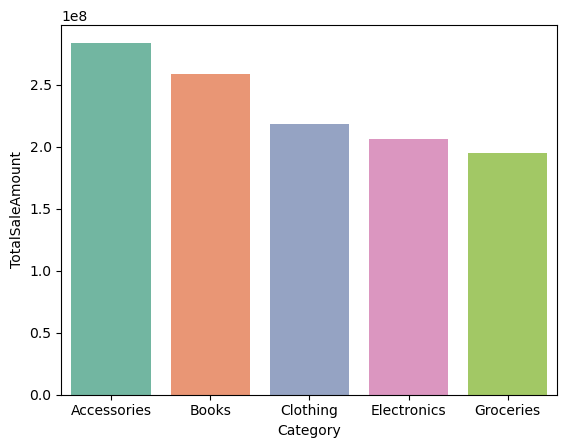

In [19]:
#Plot the bar graph representing the sale amount for each product category
sns.barplot(data=total_sum_by_category,x = 'Category', y = 'TotalSaleAmount', palette='Set2', hue='Category')
plt.show()

In [20]:
#Create a new column for 'SaleTime' to covert string data to proper time data  
commercialData['SaleTime'] = pd.to_datetime(commercialData['SaleDate'], format="%Y-%m-%d %H:%M:%S")

#Display the new row
commercialData.head(10)


,TransactionID,ProductID,CustomerID,Quantity,SaleDate,ProductName,Category,Price,Stock,TotalSaleAmount,SaleTime
0,1,104,1248,7,2020-01-01 00:00:00,Product_104,Accessories,150.05,301,1050.35,2020-01-01
1,2,103,1874,6,2020-01-01 00:00:00,Product_103,Books,226.54,64,1359.24,2020-01-01
2,3,105,1792,4,2020-01-01 00:00:00,Product_105,Accessories,432.49,21,1729.96,2020-01-01
3,4,108,1783,5,2020-01-01 00:00:00,Product_108,Clothing,25.45,444,127.25,2020-01-01
4,5,106,1924,9,2020-01-01 00:00:00,Product_106,Electronics,468.71,437,4218.39,2020-01-01
5,6,110,1794,3,2020-01-01 00:00:00,Product_110,Groceries,493.78,377,1481.34,2020-01-01
6,7,142,1150,7,2020-01-01 00:00:00,Product_142,Accessories,48.73,479,341.11,2020-01-01
7,8,112,1103,8,2020-01-01 00:00:00,Product_112,Electronics,154.22,179,1233.76,2020-01-01
8,9,131,1150,1,2020-01-01 00:00:00,Product_131,Books,157.36,90,157.36,2020-01-01
9,10,111,1846,2,2020-01-01 00:00:00,Product_111,Groceries,140.77,228,281.54,2020-01-01


In [21]:
#Extract day, month and week from "SaleTime" column 
commercialData['SaleDay'] = commercialData["SaleTime"].dt.day_of_year
commercialData['SaleMonth'] = commercialData["SaleTime"].dt.month
commercialData["SaleWeek"] = commercialData.apply(lambda row : (int(row["SaleDay"]/7)+1), axis=1)


In [22]:
#Display the last 10 entries from the daytime column 
commercialData.tail(10)

,TransactionID,ProductID,CustomerID,Quantity,SaleDate,ProductName,Category,Price,Stock,TotalSaleAmount,SaleTime,SaleDay,SaleMonth,SaleWeek
999990,999991,103,1172,6,2020-02-11 15:00:00,Product_103,Books,226.54,64,1359.24,2020-02-11 15:00:00,42,2,7
999991,999992,138,1792,4,2020-02-11 15:00:00,Product_138,Accessories,151.98,321,607.92,2020-02-11 15:00:00,42,2,7
999992,999993,131,1720,4,2020-02-11 15:00:00,Product_131,Books,157.36,90,629.44,2020-02-11 15:00:00,42,2,7
999993,999994,127,1266,9,2020-02-11 15:00:00,Product_127,Groceries,121.28,24,1091.52,2020-02-11 15:00:00,42,2,7
999994,999995,124,1362,5,2020-02-11 15:00:00,Product_124,Groceries,185.67,150,928.35,2020-02-11 15:00:00,42,2,7
999995,999996,103,1632,7,2020-02-11 15:00:00,Product_103,Books,226.54,64,1585.78,2020-02-11 15:00:00,42,2,7
999996,999997,140,1280,6,2020-02-11 15:00:00,Product_140,Accessories,315.16,454,1890.96,2020-02-11 15:00:00,42,2,7
999997,999998,109,1586,6,2020-02-11 15:00:00,Product_109,Accessories,369.55,360,2217.30,2020-02-11 15:00:00,42,2,7
999998,999999,147,1712,6,2020-02-11 15:00:00,Product_147,Clothing,101.42,319,608.52,2020-02-11 15:00:00,42,2,7
999999,1000000,124,1240,2,2020-02-11 15:00:00,Product_124,Groceries,185.67,150,371.34,2020-02-11 15:00:00,42,2,7


In [23]:
#Aggregate all the sales quantities for each week
total_sales_by_week = commercialData.groupby("SaleWeek").agg({'Quantity':'sum'})
total_sales_by_week

,Quantity
SaleWeek,
1,719914
2,839417
3,840577
4,838162
5,840693
6,840051
7,80388


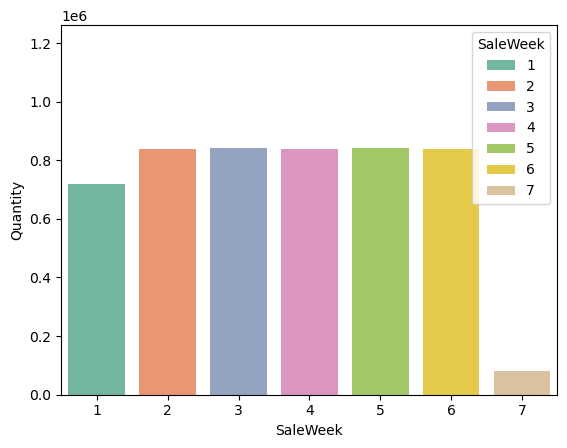

In [24]:
#Plot the bar graph for the sales data for each week
high = total_sales_by_week["Quantity"].max()

#Adjust the plot using max value 
plt.ylim([0, math.ceil(high+0.5*(high))])
sns.barplot(data=total_sales_by_week,x = 'SaleWeek', y = 'Quantity', palette='Set2', hue='SaleWeek')
plt.show()

In [60]:
start_date = str(input("Enter the start date in dd-mm-yyyy format : "))
end_date = str(input("Enter the end date in dd-mm-yyyy format : "))

start_date = datetime.datetime.strptime(start_date,"%d-%m-%Y")
end_date = datetime.datetime.strptime(end_date,"%d-%m-%Y")

In [59]:
type(start_date)

datetime.datetime

In [30]:
sales_per_day_per_category = pd.crosstab(commercialData['SaleTime'], commercialData['Category'])
sales_per_day_per_category

Category,Accessories,Books,Clothing,Electronics,Groceries
SaleTime,,,,,
2020-01-01 00:00:00,237,287,160,156,160
2020-01-01 01:00:00,265,263,165,155,152
2020-01-01 02:00:00,255,289,165,154,137
2020-01-01 03:00:00,260,275,143,171,151
2020-01-01 04:00:00,229,274,161,178,158
...,...,...,...,...,...
2020-02-11 11:00:00,247,271,178,153,151
2020-02-11 12:00:00,258,292,155,150,145
2020-02-11 13:00:00,259,267,171,157,146


In [61]:


fetched_data = sales_per_day_per_category.loc[start_date:end_date]
fetched_data


Category,Accessories,Books,Clothing,Electronics,Groceries
SaleTime,,,,,
2020-01-02 00:00:00,227,282,184,166,141
2020-01-02 01:00:00,248,305,166,151,130
2020-01-02 02:00:00,262,259,170,150,159
2020-01-02 03:00:00,234,276,173,158,159
2020-01-02 04:00:00,235,277,176,152,160
...,...,...,...,...,...
2020-01-22 20:00:00,250,277,152,173,148
2020-01-22 21:00:00,241,293,175,145,146
2020-01-22 22:00:00,246,298,150,171,135


In [62]:
sales_in_range = dict.fromkeys(commercialData["Category"].unique())

for i in sales_in_range.keys() :
    sales_in_range[i] = fetched_data[i].sum()

sales_in_range 

{'Accessories': 123874,
 'Books': 143904,
 'Clothing': 82510,
 'Electronics': 82309,
 'Groceries': 72403}

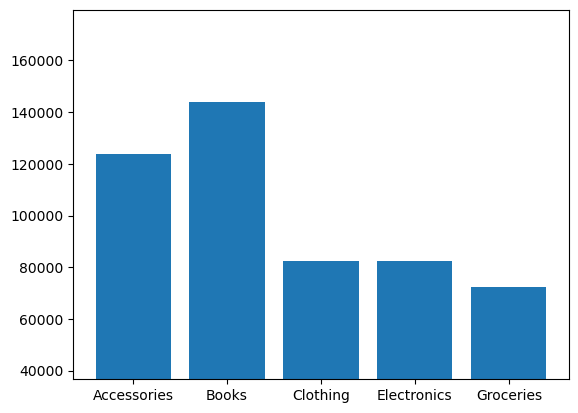

In [63]:
low = min(sales_in_range.values())   #Find the lowest number in the sales 
high = max(sales_in_range.values())   #Find the highest number in the sales 

#Set the limit of the y-axis to the nearset integer (smaller than lower and higher than the highest)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(sales_in_range.keys(), sales_in_range.values())
plt.show()